# Assignment 1 - Linear Algebra


In this exercise, you will investigate various aspects of linear algebra.

* Use appropriate functions
* Comment your code.
* Use numpy/scipy libraries where appropriate, except where explicitly stated.

For each question where you are asked to write some code, you will also be asked to _briefly_ describe what you have done in a text cell below.  


## Q1

In this part you will need to use the matrix inversion code based on Cramer's rule, posted in the matrix-inversion notebook on Blackboard. Cut and paste the necessary functions into the cell below.

In [58]:
import numpy as np
import scipy as sp
from scipy import linalg
import time
import math
import matplotlib.pyplot as plt
import random
from math import log10, floor #used for the rounding function


def det2x2(m):
    if m.shape[0] != 2 or m.shape[1] != 2:
        raise Exception("Non2x2Matrix")

    return ( m[0][0]*m[1][1] ) - ( m[0][1]*m[1][0] )

def inverse2x2(m):
    if (m.shape[0] != 2 or m.shape[1] != 2):
        raise Exception("Non2x2Matrix")

    det = det2x2(m)
    tmp = np.empty([2,2])
    tmp[0][0] = m[1][1] / det
    tmp[0][1] = -1 * m[0][1] / det
    tmp[1][0] = -1 * m[1][0] / det
    tmp[1][1] = m[0][0] / det
    return tmp

#__________________________________________________________________________________________

def submatrix(m,i,j):
    if not (m.shape[0] == m.shape[1]):
        raise Exception("NonSquareMatrix")

    # create a new matrix
    n = m.shape[0]-1
    tmp = np.empty([n,n])

    # get the indices of the matrix that will be used
    tmpi = list(range(m.shape[0]))
    del tmpi[i]
    tmpj = list(range(m.shape[1]))
    del tmpj[j]

    for ii in range(n):
        for jj in range(n):
            tmp[ii][jj] = m[tmpi[ii]][tmpj[jj]]

    return tmp
#__________________________________________________________________________________________



def det(m):
    if not (m.shape[0] == m.shape[1]):
        raise Exception("NonSquareMatrix")


    if (m.shape[0]==2):
        return det2x2(m)

    else:
        tmp = 0
        # use 0-th row to calculate determinant
        for j in range(m.shape[0]):
            tmp = tmp + (math.pow(-1,j) * m[0][j] * det(submatrix(m,0,j)))

    return tmp

def adjugate(m):
    if not (m.shape[0] == m.shape[1]):
        raise Exception("NonSquareMatrix")

    tmp = np.empty(m.shape)

    for i in range(m.shape[0]):
        for j in range(m.shape[1]):
            # note the order of indices below !
            tmp[j][i] = (math.pow(-1,i+j) * det(submatrix(m,i,j)))
    return tmp

#__________________________________________________________________________________________

def inverse(m):
    if not (m.shape[0] == m.shape[1]):
        raise Exception("NonSquareMatrix")

    if m.shape[0]==2:
        return inverse2x2(m)

    d = det(m)
    c = adjugate(m)
    return np.true_divide(c,d)

## 1a)
Verify that the code produces the correct result for a single _randomly_ generated, real, 4x4 matrix. Make sure you account for possible rounding error due to limited floating point precision. 

In [59]:
######## RANDOM NUMBER GENERATOR

# I made my own random number generator instead of using the built in numpy one to deal with decimal places. This way, matrix elements are limited to 1 decimal place. the range of numbers can also be specified.

def integer():
    for i in range(10):
        random_int= random.randint(intmin,intmax)
    return random_int

def dec_point():
    for i in range(10):
        random_int = random.randint(1,10)
        rand_dec = random_int * 0.1
        return rand_dec

def round_to_1(x): #to make sure that there are no 0.0000000001's floating around.
    return round(x, -int(floor(log10(abs(x)))))



def matrix_values():
    numbers_generated = d

    values = []
    i=1 #MAKE SURE THIS IS ONE! SO THAT THE NUMBER OF LOOPS WILL BE CORRECT.
    while i <= numbers_generated: #limits how many times this loop is run to maximise efficiency.
        random_number = integer() + round_to_1(dec_point())
        values.append(random_number)
        i += 1
    return values

myinput_n_min = float(input('Please input your range of randomly generated matrix elements. \n From: ')) #input to determine the range of randomly generated matrix elements
myinput_n_max = float(input('\n To:'))
intmin = myinput_n_min
intmax = myinput_n_max


MyInput = '0'
while MyInput != 'q':
    MyInput = input('Would you like to \n (a) Generate a NxN matrix and its inverse \n (q) Quit \n Choice: ')
    print('___________________________________________')
    if MyInput == 'a':

        myoptions = input("\n This programme generates the inverse of a randomly generated NxN matrix. \n N value choice: ")
        print('___________________________________________')

        if int(myoptions) > 1:

            c = int(myoptions) #N from NxN matrix.
            d = c * c
            a = np.arange(d, dtype = float).reshape(c,c)
            np.set_printoptions(precision=3)

            #this loop here is just made to cycle through all of the values of the array.
            i=0
            while i < c:
                u=0
                while u < c:
                    a[i][u] = float(matrix_values()[0])
                    #print(a[i][u])
                    u+=1
                i+= 1



            #print('randomly generated numbers (to make sure the generator works): ')
            #print(matrix_values())

            print('\n original matrix: ')
            print(a)
            print("\n inverted matrix - Cramer's rule (to 3 d.p): ")
            print(inverse(a))
            print('\n linalg.inv(): ')
            print(sp.linalg.inv(a))
            #print(myoptions)
            print('___________________________________________')

        else:
            print('this is not a valid option')
            print('___________________________________________')

    # managed to do the whole thing for a 3x3 matrix. however, it wants a 4x4 matrix.
    #do not use the same abcdefg system for 4x4. instead make a list, then as the list repeats make it cycle through it
    elif MyInput == 'q':
        print('\n you have chosen to quit')
        print('___________________________________________')


Please input your range of randomly generated matrix elements. 
 From: 1

 To:10
Would you like to 
 (a) Generate a NxN matrix and its inverse 
 (q) Quit 
 Choice: a
___________________________________________

 This programme generates the inverse of a randomly generated NxN matrix. 
 N value choice: 4
___________________________________________

 original matrix: 
[[ 8.8  7.4  4.4  7.4]
 [ 3.6  7.2  1.2 10. ]
 [10.7  3.2  6.2  8.2]
 [ 3.4  5.   4.2  4.8]]

 inverted matrix - Cramer's rule (to 3 d.p): 
[[ 0.195 -0.056  0.023 -0.221]
 [ 0.211 -0.035 -0.178  0.052]
 [-0.18  -0.092  0.065  0.356]
 [-0.2    0.156  0.112 -0.001]]

 linalg.inv(): 
[[ 0.195 -0.056  0.023 -0.221]
 [ 0.211 -0.035 -0.178  0.052]
 [-0.18  -0.092  0.065  0.356]
 [-0.2    0.156  0.112 -0.001]]
___________________________________________
Would you like to 
 (a) Generate a NxN matrix and its inverse 
 (q) Quit 
 Choice: q
___________________________________________

 you have chosen to quit
_________________________

## 1b)
Plot the cpu-time taken to solve a randomly generated simultaneous equation as a function of the matrix order N. Your plot should contain 3 lines, for each of the following methods :
1. the matrix inversion function above based on Cramer's rule
2. LU decomposition using scipy
3. SVD decomposition using scipy

Note that you will need to generate both a random real NxN matrix, and a random set of solutions (ie. RHS of the matrix equation). You will need to think about how you're going to handle errors (eg. if you generate a random matrix that is singular). You will need to look up the LU and SVD decomposition routines in the scipy reference manual (https://docs.scipy.org/doc/scipy/reference/), and make sure that your treatment of each routine is "fair", i.e. performs the same calculation.

You may want to read up on these methods in Numerical Recipes. The 3rd edition is available free online at http://numerical.recipes/oldverswitcher.html. LU decomposition is on p48 and SVD decomposition is on p65 in this edition.

Finally, write a paragraph describing your code in the text cell below : how you designed the code, what choices you had to make, and why - in particular how you deal with the issues raised above.

___________________________________________

 Computing for N=  1
Determinant:  92.30000000000003
______________________________________________________________________________________

 Computing for N=  2
Determinant:  3155.8800000000024
______________________________________________________________________________________

 Computing for N=  3
Determinant:  208838.1549999998
______________________________________________________________________________________

 Computing for N=  4
Determinant:  -6658781.1213000035
______________________________________________________________________________________

 Computing for N=  5
Determinant:  4278076449.1248546
______________________________________________________________________________________

 Computing for N=  6
Determinant:  -57372591404.15883
______________________________________________________________________________________


/Users/ardjuna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in true_divide



 Computing for N=  7
Determinant:  1623252519825.257
______________________________________________________________________________________
___________________________________________
latest A matrix: 
[[93.8 75.7 90.9 56.9 49.4 19.3 74. ]
 [37.  58.  13.  44.1 66.3  6.9 69.1]
 [54.9 16.8 55.8 25.8 35.8 33.1 94.3]
 [56.8 54.3 50.6 18.1 50.7 20.1 22.2]
 [75.6 26.7 93.2 56.1 97.   3.6 52.2]
 [71.5 90.1 35.9 65.5 91.3 67.7 55. ]
 [35.5 47.4 62.3 75.7 34.1 13.5 35.6]]

 Latest inversions (for N =  8 )

 Using linalg.inv: 
[[ 0.049 -0.014 -0.022 -0.058  0.015  0.022 -0.038]
 [-0.01   0.012  0.001  0.034 -0.015 -0.011  0.013]
 [-0.025 -0.002  0.015  0.042 -0.006 -0.017  0.024]
 [ 0.017 -0.005 -0.012 -0.039  0.008  0.013  0.   ]
 [-0.018  0.007  0.002  0.015  0.007 -0.001  0.001]
 [-0.013 -0.013  0.012  0.008 -0.005  0.011  0.006]
 [-0.005  0.01   0.012  0.005 -0.006 -0.007  0.003]]
Using Cramers: 
[[ 0.049 -0.014 -0.022 -0.058  0.015  0.022 -0.038]
 [-0.01   0.012  0.001  0.034 -0.015 -0.01

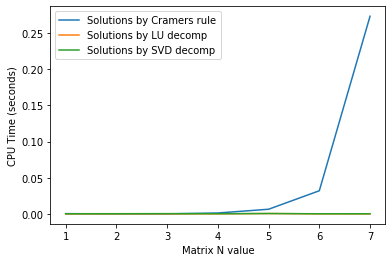

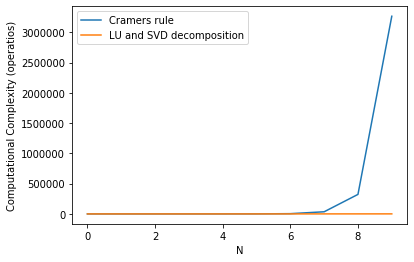

In [57]:

def cramerssolution(a,b): #solution to the simultaneous equations using cramers rule
    inv_cramers = inverse(a)
    cramers_sol = inv_cramers.dot(b)
    return cramers_sol

def lusolution(a,b):#solution to the simultaneous equations using LU decomposition
    lu_and_piv= sp.linalg.lu_factor(a, overwrite_a=False, check_finite=True)
    lu_sol = sp.linalg.lu_solve(lu_and_piv, b, trans=0, overwrite_b=False, check_finite=True)
    return lu_sol


def svdsolution(a,b): #solution to the simultaneous equations using SVD decomposition
    M,N = a.shape # the dimensions of matrix A
    U,s,Vh = linalg.svd(a)
    cc = np.dot(U.T,b)
    ww = np.linalg.solve(np.diag(s),cc)
    svd_sol = np.dot(Vh.T,ww)
    return svd_sol

ii_vals = [] #maximum N value that the code will calculate (for NxN matrix)
time_inverse = []
linalg_inverse = []
time_lu = []
time_svd = []



print('___________________________________________')
ii=1
while ii <=7:

    c=int(ii)
    d = c * c #used to generate the random NxN matrix
    a = np.arange(d, dtype = float).reshape(c,c) #generates the array but with normal numbers increasing from 1. These values will be replaced later.
    b  = np.arange(c, dtype = float).reshape(c,1)
    np.set_printoptions(precision=3)

  
    i=0 
    while i < c: #a loop used to replace the previously generated NxN matrix with random matrix elements.
        u=0
        b[i] = float(matrix_values()[0])
        while u < c:
            a[i][u] = float(matrix_values()[0])
            #print(a[i][u])
            u+=1
        i+= 1

    if np.linalg.det(a) == 0: #to prevent the code from analysing a zero determinant matrix
        raise Exception("Zero Determinant")

    ii_vals.append(ii)

    print('\n Computing for N= ', ii)


    ##########################SVD decomposition
    s_time_1 = time.time()

    inv_cramersss = inverse(a)
    cramers_solutions = inv_cramersss.dot(b)

    e_time_1 = time.time()
    time_inverse.append(e_time_1- s_time_1)






    ##########################

    s_time_2 = time.time()
    linalg_inverseee = sp.linalg.inv(a)
    e_time_2 = time.time()
    linalg_inverse.append(e_time_2- s_time_2)




    ########################## LU DECOMPOSITION AND SOLVE
    s_time_3 = time.time()

    lu_and_piv= sp.linalg.lu_factor(a, overwrite_a=False, check_finite=True)
    lu_solution = sp.linalg.lu_solve(lu_and_piv, b, trans=0, overwrite_b=False, check_finite=True)

    #y = inverse(L).dot(b)
    #x = inverse(U).dot(y)
    #lu_solution = x
    #this should be right. I just coded in what I found on the internet.


    e_time_3 = time.time()
    time_lu.append(e_time_3- s_time_3)








    ##########################SVD decomposition
    M,N = a.shape # so these are just the dimensions.
    s_time_4 = time.time()


    U,s,Vh = linalg.svd(a) #this just automatically spits out what we need. dont need to hard code the algorithm.
    Sig = linalg.diagsvd(s,M,N)
    U, Vh = U, Vh
    #inverted matrix using svd:
     #the transpose is also the inverse for these matrices. so to compare with pure cramers method, we need to use inverse instead of transpose.
    #https://www.quora.com/How-do-I-get-the-inverse-of-a-matrix-using-SVD-in-Python
    mult= U.dot(Sig.dot(Vh))


    #-----from another website https://sukhbinder.wordpress.com/2013/03/26/solving-axb-by-svd/

    cc = np.dot(U.T,b)
    ww = np.linalg.solve(np.diag(s),cc)
    xx = np.dot(Vh.T,ww)
    e_time_4 = time.time()
    time_svd.append(e_time_4- s_time_4)

    inv_svd = inverse(Vh).dot(np.diag(1/s).dot(inverse(U)))
    print('Determinant: ',np.linalg.det(a))

    print('______________________________________________________________________________________')
    ii+=1
    #print(len(ii_vals))
    #print(len(time_inverse))


    #print(myoptions)
print('___________________________________________')
print('latest A matrix: ')
print(a)


print('\n Latest inversions (for N = ', ii, ')')
print('\n Using linalg.inv: ')
print(linalg_inverseee)
print('Using Cramers: ')
print(inv_cramersss)
print('First decomposed by SVD: ')
print(inv_svd)



print('latest B matrix: ')
print(b)
print('\n Solutions to randomly generated simultaneous equations Ax=B')
print('Cramers Solutions: ')
print(cramers_solutions)
print('LU Solutions: ')
print(lu_solution)
print('SVD Solutions: ')
print(xx)


plt.plot(ii_vals,time_inverse, label = 'Solutions by Cramers rule')
plt.plot(ii_vals,time_lu, label = 'Solutions by LU decomp')
plt.plot(ii_vals,time_svd, label = 'Solutions by SVD decomp')
#plt.plot(ii_vals,time_svd, label = 'SVD Decomp')
plt.xlabel('Matrix N value')
plt.ylabel('CPU Time (seconds)')
#plt.xlim(4,7)
plt.legend()
plt.show()





###computational complexity
Nvals = []
cram = []
lu = []
N = 0
while N <=9:
    o_cramer = math.factorial(N)*N
    o_lusvd = N**3
    cram.append(o_cramer)
    lu.append(o_lusvd)
    Nvals.append(N)
    N+=1
    
plt.plot(Nvals, cram, label = 'Cramers rule')
plt.plot(Nvals, lu, label = 'LU and SVD decomposition')
plt.xlabel('N')
plt.ylabel('Computational Complexity (operatios)')
plt.legend()
plt.show()
    
    



First a randomly generated matrix ‘a’ was created using the np.arange command. However, this created a matrix of ascending numbers. Using the random number generator developed in part a, I replaced each of the matrix elements with a random number in a specified range.

The maximum N value was set to 7. I noticed that the computation times became extremely slow after 9. At N=11, the processing time exceeded an hour.

The determinants for each randomly generated NxN matrix was printed. This was to keep an eye out for any matrix that could have zero determinant (a singular matrix). This ‘failsafe’ was also coded within the loop.

The ‘latest A matrix’ out put is simply the latest generated matrix with the maximum N value. Inversions for all three methods were also printed. This was done to ensure that the algorithms were applied to the same matrix, which produced fair results.


## 1c)
Now discuss the results you obtained above. Can you explain the results in terms of the number of operations performed by each function ?  You might want to look up the **computational complexity** of these algorithms.  How well do the curves conform to your explanation ?

As shown above, the processig time for Cramers rule of an NxN matrix is significantly larger than LU and SVD decompositions for N>4. However, it is smaller when N<3.

The fluctuations in cramers rule can be explained using computational complexity. It is a theorem that relates the processing time to the amount of resources needed to run the algorithm. The computational complexity is given by O(N!x N). Therefore, the number of operations increases with the number of columns and rows.

When N=4, the computational complexity is 96. by just adding a column and row, this number increases to 600. This explains the lengthy processing time at N>10, as this will require 36,288,000 operations. As mentioned before, a reasonable N value to reach was 9, which requires 3,265,920 operations.


For LU and SVD decompositions, the computational complexity is proportional to N^3. When N = 3, LU and SVD decompositions have complexities of 27 operations. In contrast, Cramers rule has a complexity of 18. This is why it is more efficient to use Cramers rule for N<3.

The curves conform well to this explanation as the graph of processing time is directly porportional to compoutational complexities for each method.




## 1d)
Next, we will study the precision of the algorithms - in particular, for near singular matrices. Write a routine that will estimate (and plot) the precision of the result when solving the equation below, for small values of k. Your function should do this for all 3 routines studied in Q1b).

\begin{eqnarray*}
x + y + z & = & 5 \\
x + 2y - z & = & 10 \\
2x + 3y +kz & = & 15 
\end{eqnarray*}

You will need to choose a method to estimate the precision, given that the equation solvers will return values for all of x, y, and z.

As before, describe the functionality of the code and the choices you made writing it in the text cell below.

Values of k range to 1.
Please enter the starting k value 
Or press "a" for the default: a
Please enter the precision at which k increases 
Or press "a" for the default: a


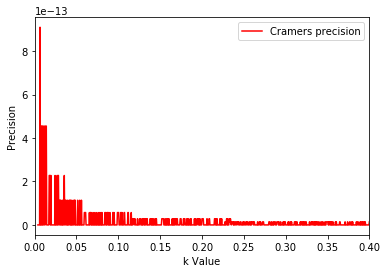

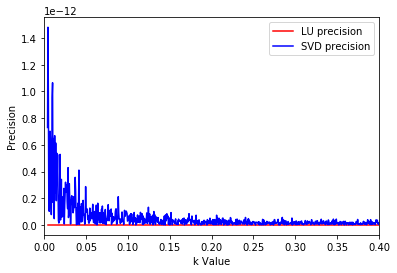

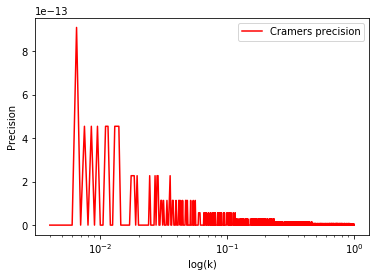

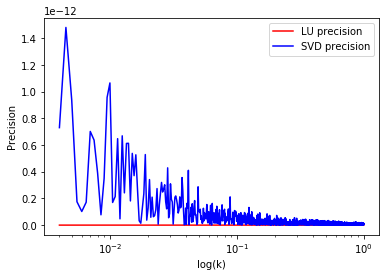

[Processing time=  -0.0003921985626220703  seconds]


In [41]:
##### relevant functions for part d
def ask_k(): 

    print('Values of k range to 1.')
    myinput = input('Please enter the starting k value \nOr press "a" for the default: ')
    if myinput == 'a':
        k = 0.004 #starting k value, can't be zero because this will create an error of zero determinant
    else:
        k = float(myinput)
    return k

def ask_dk():
    myinput = input('Please enter the precision at which k increases \nOr press "a" for the default: ')
    if myinput == 'a':
        dk = 0.0005 #starting k value
    else:
        dk = float(myinput)

    return dk
  #____________________________________________________________________________________________________



def part_c():
    k = kaskkkk
    dk = dkaskkkk
    b = [5,10,15] #second half of the simultaneous equations
    abs_xyz = 5

    kvals = []
    log_k_vals = []
    C_difference = []
    lu_difference = []
    svd_difference = []



    t_b = time.time()


    while k <= 1 :


        a = np.array([[1,1,1],
      [1,2,-1],
      [2,3,k]]) #put into the loop so that k can change after each iteration
        
        #finding solutions using Cramers Rule

        cramers_solutions = cramerssolution(a,b)

        #finding solutions using LU Decomposition
        lu_solutions = lusolution(a,b)

        #finding solutions using SVD Decomposition
        svd_solutions = svdsolution(a,b)




        #absolute values for comparison of precision

        abs_c = (cramers_solutions[0]**2 + cramers_solutions[1]**2 + cramers_solutions[2]**2)**(0.5)
        abs_lu = (lu_solutions[0]**2 + lu_solutions[1]**2 + lu_solutions[2]**2)**(0.5)
        abs_svd = (svd_solutions[0]**2 + svd_solutions[1]**2 + svd_solutions[2]**2)**(0.5)

        # lines of code to put the solutions into lists
        C_difference.append(abs(abs_c - abs_xyz))
        lu_difference.append(abs(abs_lu - abs_xyz))
        svd_difference.append(abs(abs_svd - abs_xyz))
        kvals.append(k)
        log_k_vals.append(math.log(k)) #in an attempt to plot straight line graphs

        k += dk
    t_a = time.time()

    return kvals, log_k_vals, C_difference, lu_difference, svd_difference, t_a, t_b,


kaskkkk = ask_k()
dkaskkkk = ask_dk()


plt.plot(part_c()[0], part_c()[2], label = 'Cramers precision', color = 'red')
plt.xlabel('k Value')
plt.ylabel('Precision')
plt.xlim(0,0.4)
plt.legend()
plt.show()
plt.plot(part_c()[0], part_c()[3], label = 'LU precision', color = 'red')
plt.plot(part_c()[0], part_c()[4], label = 'SVD precision', color = 'blue')
plt.xlabel('k Value')
plt.ylabel('Precision')
plt.xlim(0,0.4)
plt.legend()
plt.show()

#log graphs
plt.plot(part_c()[0], part_c()[2], label = 'Cramers precision', color = 'red')
plt.xlabel('log(k)')
plt.ylabel('Precision')
plt.legend()
plt.xscale('log')
plt.show()
plt.plot(part_c()[0], part_c()[3], label = 'LU precision', color = 'red')
plt.plot(part_c()[0], part_c()[4], label = 'SVD precision', color = 'blue')
plt.xlabel('log(k)')
plt.ylabel('Precision')
plt.legend()
plt.xscale('log')
plt.show()

print('[Processing time= ', float(part_c()[5] - part_c()[6]), ' seconds]')




Here I created three new functions. One was to input the starting k value, the second was to input the step size of k and the third included the loop which did the main calculations for the graphs.

The starting k value was a very small decimal instead of zero to avoid the zero determinant error. Note the default values are given in option a of each function.

The main matrix ‘a’ was put into the while loop so that that k could change after each iteration.

Absolute values needed to be taken of each solution to produce scalar answers for plotting.

log k graphs were generated to emphasise the behaviour of the precision as it approached zero.

## 1e)
Discuss your results in the test box below. You should describe the behaviour of each algorithm as k goes to 0, and explain what is happening in each case. How would these results affect your choice of algorithm ?

For both Cramers rule and SVD decomposition, the errors increase drastically as k approaches 0. Although between the two of them, it would be 10% more precise to use Cramers rule as demonstrated by the log graphs.

LU decomposition shows no error in precision at all, even as k rapidly approaches 0. This could be because its native precision is a lot higher than the floating point precision given by python, which is to the order of 10^15.

From this point, it is obvious to use LU decomposition as the main algorith to solve simultaneous equations at is the algorith which has zero errors as k approaches zero.

## Q2
This question is on eigenvalue problems.  

## 2a)
In this part you should write a function that will find the eigenvector/eigenvalues of a Hermitian matrix A using "Rayleigh quotient iteration". The algorithm is as follows :

1. An initial values for the eigenvalue $\mu_0$ and eigenvector $b_0$ must be supplied

2. The next approximation of the eigenvector is given by :
$$b_{i+1} = \frac{(A-\mu_i I)^{-1}b_i}{|(A-\mu_i I)^{-1}b_i|}$$

3. The corresponding eigenvalue is given by :

$$\mu_{i+1} = \frac{b^*_{i+1}Ab_{i+1}}{b^*_{i+1}b_{i+1}}$$

4. Now iterate steps 2 and 3 until convergence is reached for a specified precision, ie.
$$\mu_{i+1} - \mu < a_{tol}$$

(Note that the numerator in 2. can also be found by solving $(A-\mu_i I)x = b$) 

Your function should take arguments for the matrix A, the initial estimates of eigenvalue and eigenvector, and the precision required (ie. a convergence condition). You should use vector and matrix algebra routines from numpy and scipy.linalg for the operations described above. For simplicity, you can restrict your work to real symmetric matrices.

Explain the choices you made when writing this code in the text cell below.

In [51]:

n=3
a = np.array([[8,1,7],
              [1,4,9],
              [7,9,8]])

b = np.array([2,2,2])
print('vector A: ')
print(a)
print('vector B: ')
print(b)

mu = 1
muplus1 = 0

diff = 10
I = np.array([[1,0,0],
            [0,1,0],
            [0,0,1]])
i=0
ii = 0
while diff >=0.000001:

    numeratorr = linalg.inv(np.subtract(a , mu* I))
    bplus1 = numeratorr.dot(b)/np.linalg.norm(numeratorr.dot(b))
    
    bconj = np.conj(bplus1)
    muplus1 = (bconj.dot(a.dot(bplus1)))/(bconj.dot(bplus1))
    

    diff = np.linalg.norm(muplus1 - mu)
    mu = muplus1
    b = bplus1
 


print('___________________________________')

mu_real, b_r = np.linalg.eigh(a)

print('final mu')
print(mu)
print('mu real')

print(mu_real)

print('final b')
print(b)
print('b')
print(b_r)
 #gives the eigenvalues then the eigenvectors.

print('___________________________________')


vector A: 
[[8 1 7]
 [1 4 9]
 [7 9 8]]
vector B: 
[2 2 2]
___________________________________
final mu
18.83434112573983
mu real
[-4.446  5.612 18.834]
final b
[0.509 0.471 0.72 ]
b
[[ 0.321  0.799 -0.509]
 [ 0.673 -0.571 -0.471]
 [-0.667 -0.191 -0.72 ]]
___________________________________


The code consisted of a simple loop with the equations given for mu and b. 
The matrix elements of ‘a’ were written randomly. The final results were compared to the scipy generated eigenvalues and eigenvectors. It was established that the algorithm gave 1/3 of the eigenvalues and eigenvectors.
The starting point of mu (1) was selected at random. It was observed that inputting different mu0 values would cause the equations to converge to different eigenvalues.


### 2b)
Now test your function using a matrix with known eigenvalues / vectors. You can use :
$$\left(\begin{array}{ccc} 1 & 2 & 3 \\ 1 & 2 & 1 \\ 3 & 2 & 1 \end{array}\right)$$

The leading eigenvalue of this matrix is $\sqrt{5}+3$, which corresponds to the eigenvector :
$$\left(\begin{array}{c} 1 \\ \frac{\sqrt(5)-1}{2} \\ 1 \end{array}\right)$$

In [29]:



a = np.array([[1,2,3],[1,2,1],[3,2,1]])
b = np.array([1,math.sqrt(5)/2,1])


print(a)
print(b)
mu = 5
print('mu_0= ', mu)

diff = 10

while diff >0.000000000001:

    numeratorr = sp.linalg.inv(a - mu* np.identity(3)).dot(b)
    bplus1 = numeratorr/np.linalg.norm(numeratorr)
    bconj = np.conj(bplus1)
    muplus1 = (bconj.dot(a.dot(bplus1)))/(bconj.dot(bplus1))
    b = bplus1

    diff = np.linalg.norm(muplus1 - mu)

    mu = muplus1

print('___________________________________')

mu_real, b_real = sp.linalg.eig(a)

all_printed = sp.linalg.eigh(a)

print('final mu')
print(mu)
print('mu real')

print(mu_real)

print('final b')
print(b)
answer1 =b[0]/b[0]
answer2 =b[1]/b[0]
answer3 =b[2]/b[0]
print('final normalised values: ')
print(answer1,answer2,answer3)
 #gives the eigenvalues then the eigenvectors.



[[1 2 3]
 [1 2 1]
 [3 2 1]]
[1.    1.118 1.   ]
mu_0=  5
___________________________________
final mu
5.23606797749979
mu real
[ 5.236+0.j -2.   +0.j  0.764+0.j]
final b
[0.648 0.4   0.648]
final normalised values: 
1.0 0.618033988749895 1.0


## 2c)
Your function should find one eigenvalue of a Hermitian (or real symmetric) matrix, along with it's corresponding eigenvector. Can you think of a method to find the other eigenpairs ?  Can you use the fact that the eigenvectors of a real symmetric matrix are orthogonal ? Discuss a possible algorithm to find further eigenpairs in the text box below, and use the code cell below if you want to write some code to demonstrate your answer. 

Here I coded a trial and error loop. The code relies on the orthogonality of the solutions.
A random matrix c was generated with positive and negative matrix elements. In theory, if it is another eigenvector, the dot product (x in the code) with the previously determined eigenvector would give zero.

The code continuously produces random c matrices until this condition is met.

In [53]:


x=69




print('___________________________________')



while x < -0.000001 or x > 0.000001:
    c =  np.random.uniform(low=-0.5, high=0.5, size=(3,1))
    x = b_real[0].dot(c) 

    
print('___________________________________')
print('generated eigenvector')
print(c)
print('real eigenvectors')
print(b_real)



___________________________________
___________________________________
generated eigenvector
[[-0.286]
 [-0.053]
 [-0.263]]
real eigenvectors
[[ 0.321  0.799 -0.509]
 [ 0.673 -0.571 -0.471]
 [-0.667 -0.191 -0.72 ]]


## Q3

For this question you should write a function that will find the eigenvalues of the coupled system of oscillators shown below.

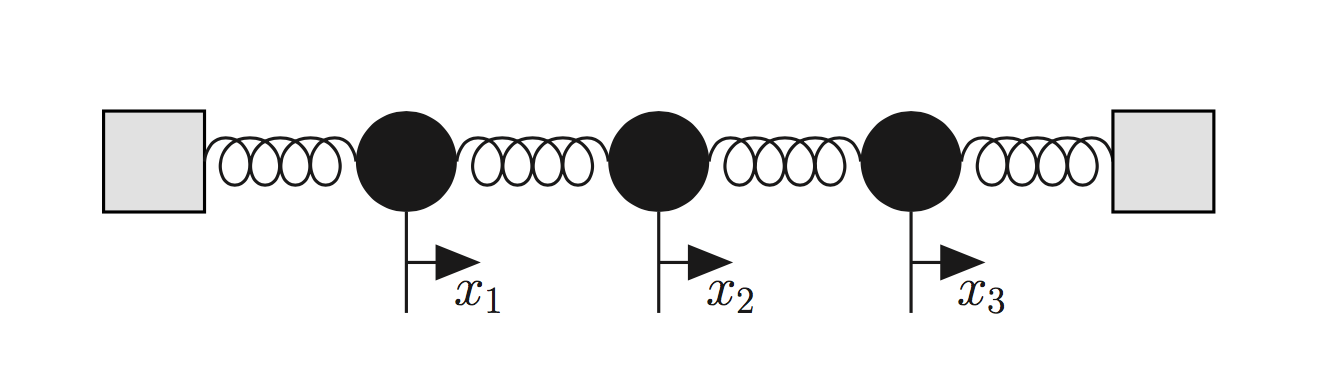

If the displacement of the $i$th mass from its equilibrium position is denoted as $x_i$, the force on the mass is given by the tension in the two springs as :

$$F_i = −k(x_i − x_i−1) + k(x_i+1 − x_i) = −k(2x_i − x_i−1 − x_i+1)$$

We can assume that there are normal mode solutions, i.e. solutions of the form $x_i = z_i e^{i\omega t}$ in which all masses oscillate with the same frequency $\omega$ but with unknown phasors $z_i$. Then the above equation becomes :

$$F_i = m\ddot{x}_i = −m\omega^2x_i = −k(2x_i − x_i−1 − x_i+1)$$

This is one row of a matrix equation describing the entire system :

$$m\omega^2x_i \left(\begin{array}{c} \vdots \\ \\ x_i \\ \\ \vdots \end{array}\right) = 
\left(\begin{array}{ccccccc} & & & \vdots & & & \\ \cdots & 0 & -1 & 2 & -1 & 0 & \cdots \\ & & & \vdots & & & \end{array}\right)
\left(\begin{array}{c} \vdots \\ x_{i-1} \\ x_i \\ x_{i+1} \\ \vdots \end{array}\right)
$$

This example is a typical eigenvalue problem, in that many of the matrix elements are zero, which can greatly simplify the computational challenge and make even large systems solvable.

## 3a)
Write a function in the cell below that will calculate the normal modes and corresponding oscillation frequencies for a system of three identical masses connected by identical springs as shown above.

As for previous questions, briefly describe how your code works and the choices you made when writing it in the text cell below.

would you like to 
 (a) See the graph with end springs attached 
 (b) See the graph with end springs removed 
 (q)Quit 
 Choice: a
Eigenvalues
[3.414+0.j 2.   +0.j 0.586+0.j]
normal mode solutions:
[[-5.000e-01 -7.071e-01  5.000e-01]
 [ 7.071e-01  4.054e-16  7.071e-01]
 [-5.000e-01  7.071e-01  5.000e-01]]
First Eigenvector: 
[[-0.5  ]
 [ 0.707]
 [-0.5  ]]
Second Eigenvector: 
[[-7.071e-01]
 [ 4.054e-16]
 [ 7.071e-01]]
Third Eigenvector: 
[[0.5  ]
 [0.707]
 [0.5  ]]
Frequencies: 
Ball 1:  (1.8477590650225726+0j)  Hz
Ball 2:  (1.414213562373095+0j)  Hz
Ball 3:  (0.7653668647301795+0j)  Hz


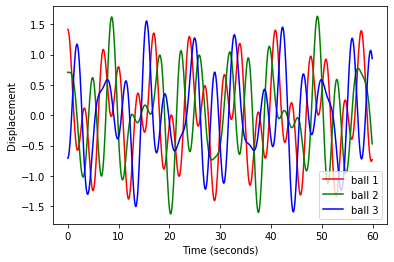

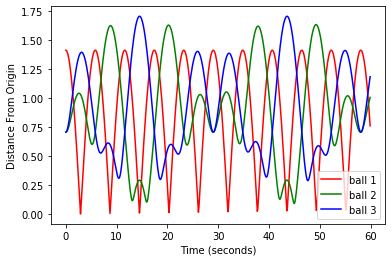

In [55]:

def rounding(strin): # a function to round the results
    rounded = round(strin,dp)
    return rounded


def eigen(k,m,y):
    A = (k/m) * np.array([[y,-1,0],
                  [-1,2,-1],
                  [0,-1,y]]) #RHS of the combined equation of motion. represents the x coefficients.
    eig_vals, eig_vec = linalg.eig(A)
    
    v1 = np.array([[eig_vec[0][0]],[eig_vec[1][0]],[eig_vec[2][0]]]) #first eigenvector
    v2 = np.array([[eig_vec[0][1]],[eig_vec[1][1]],[eig_vec[2][1]]])#second eigenvector
    v3 = np.array([[eig_vec[0][2]],[eig_vec[1][2]],[eig_vec[2][2]]])#third eigenvector
    
    return A, eig_vals, eig_vec, v1, v2, v3

def frequencies():
    w1 = np.sqrt(eigen(k,m,y)[1][0])
    w2 = np.sqrt(eigen(k,m,y)[1][1])
    w3 = np.sqrt(eigen(k,m,y)[1][2])
    return w1,w2,w3

def plot():
    tlim = 60 #time limit of the calculation

    t = 0
    tvals = []
    xivals = []
    xipvals = []
    ximvals = []
    xiabsvals = []
    xipabsvals = []
    ximabsvals = []    
    while t<= tlim:
        
        x_im = numbb[3][0]* np.exp(1j*w1*t)  +  numbb[4][0]*np.exp(1j*w2*t) + numbb[5][0]*np.exp(1j*w3*t)
        x_i = numbb[3][1]* np.exp(1j*w1*t)  +  numbb[4][1]*np.exp(1j*w2*t) + numbb[5][1]*np.exp(1j*w3*t)
        x_ip = numbb[3][2]* np.exp(1j*w1*t)  +  numbb[4][2]*np.exp(1j*w2*t) + numbb[5][2]*np.exp(1j*w3*t)
        
        x_im_abs = abs(x_im)
        x_i_abs = abs(x_i)
        x_ip_abs = abs(x_ip)
        
        xiabsvals.append(x_i_abs)
        xipabsvals.append(x_ip_abs)
        ximabsvals.append(x_im_abs)
        
        tvals.append(t)
        xivals.append(x_i)
        xipvals.append(x_ip)
        ximvals.append(x_im)
        
        t+=0.1   
    return tvals, xivals, xipvals, ximvals, xiabsvals, xipabsvals, ximabsvals


z1i= 1 + 0j
z2i = 1 + 0j
z3i = 1 + 0j

dp = 3 #decimal place choice
j = 1
z_i = 5
t = 1
x_im = 0
#x_i = z_i * math.exp(j * w * t)
x_ip = 0
m = 8
k = 8


I = np.identity(3)

def print_data():
    
    print("Eigenvalues")
    print(eigen(k,m,y)[1])
    print("normal mode solutions:")
    print(eigen(k,m,y)[2])
    print('First Eigenvector: ')
    print(eigen(k,m,y)[3])
    print('Second Eigenvector: ')
    print(eigen(k,m,y)[4])
    print('Third Eigenvector: ')
    print(eigen(k,m,y)[5])
    print("Frequencies: ")
    
    print('Ball 1: ', frequencies()[0], ' Hz')
    print('Ball 2: ', frequencies()[1], ' Hz')
    print('Ball 3: ', frequencies()[2], ' Hz')
    

def graphs_ab():

    plt.plot(plot()[0],plot()[1], color = 'red', label = 'ball 1')
    plt.plot(plot()[0],plot()[2] , color = 'green', label = 'ball 2')
    plt.plot(plot()[0],plot()[3], color = 'blue', label = 'ball 3')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Displacement')
    plt.legend()
    plt.show()
    
    plt.plot(plot()[0],plot()[4], color = 'red', label = 'ball 1')
    plt.plot(plot()[0],plot()[5] , color = 'green', label = 'ball 2')
    plt.plot(plot()[0],plot()[6], color = 'blue', label = 'ball 3')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Distance From Origin')
    plt.legend()
    
myinput = input('would you like to \n (a) See the graph with end springs attached \n (b) See the graph with end springs removed \n (q)Quit \n Choice: ')
while myinput != 'q':
    if myinput == 'a':
        y=2
        
 
        numbb = eigen(k,m,y)#used to call the eigenvetors
        freq =  frequencies()
        w1 = frequencies()[0]
        w2 = frequencies()[1]
        w3 = frequencies()[2]

        print_data()
        graphs_ab()
        break
    elif myinput == 'b':
        y=1
        
        
 
        numbb = eigen(k,m,y)#used to call the eigenvetors
        freq =  frequencies()
        w1 = frequencies()[0]
        w2 = frequencies()[1]
        w3 = frequencies()[2]

        print_data()
        graphs_ab()
        break
 
    elif myinput == 'q':
        break
    else:
        print('This option is invalid')
        


The eigen() function produces the eigenvectors and eigenvalues. Furthemore, it rearranges the eigenvectors into independent matrices.

Frequencies() generates frequency values from each eigenvalue.

graphs_ab() is a function to plot the graphs. This was created to increase efficiency as the equations of motion changes when the end strings are removed.

The main data comes from the plot() function. it takes the eigenvectors and frequencies to generate real space values of displacement about the origin. The time limit is set to 60 seconds and has a time step accuracy of 0.1s. This was an optimal time period because we can still see the periodicity of the oscillations without the graphs becoming overcrowded by the three different curves.

The user can chose the option to observe oscillations with the end springs removed. As demonstrated in the code, it changes the first and last array element from 2 to 1.

masses and spring constants are arbitrary as all balls and springs are identical.

In both options, the code prints the eigenvalues, normal mode solutions, individual eigenvectors and corresponding frequencies for each ball.

Note also that the code gives two graphs. one is simply the absolute value of displacement from the origin while the other refers to the distance that can be observed in real life. These graphs are used to visualise the movement of each ball.


## 3b)
Discuss your results above. Describe the physical interpretation of each mode you have found ? How does the behaviour change if the springs at either end are removed ?

The normal modes describe the motion of the different masses. Each corresponds to a scenario which produces a different amount of stretching on each string.

The lowest mode will have same signs which means that all masses are moving in the same direction. this indicates minimal spring stretching. The next mode will have a cooperative movement of increased strethcing, and so on. the signs of each vector element will need to change if the spring stretching is to be increased. From the modes that I have found (Eigenvectors), the stretching is demonstrated by the signs on each vector element.For example in option a, eigenvector 3 demonstrates the first normal mode, as all the signs are positive which corresponds to minimal spring stretching.


If the springs at the ends are removed, the first and second row of the k coefficient matrix changes. More specifically, the 2’s become 1’s. The result are oscillations with similar overall shape. the main difference lies in the frequency, which is much higher for the system where the end springs are removed. This is demonstrated in option b of the code above.